In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/ІТ Смарт-систем/ПР3/variant3_Processed_Version.csv")

In [ ]:
ds_original = pd.read_csv("/content/drive/MyDrive/ІТ Смарт-систем/ПР3/variant_3.csv")

### Analyzing target columns(AdoptionSpeed)

In [ ]:
ds['AdoptionSpeed'].value_counts()

4    335
2    334
3    269
1    268
0     54
Name: AdoptionSpeed, dtype: int64

Drop identification columns, they aren`t useful for clasification and choosing model

In [ ]:
ds = ds.drop(['Name','RescuerID','Description','PetID'], axis=1)
ds

,Age,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,StateName_x_Johor,StateName_x_Kedah,StateName_x_Kelantan,StateName_x_Kuala Lumpur,StateName_x_Melaka,StateName_x_Negeri Sembilan,StateName_x_Pahang,StateName_x_Perak,StateName_x_Pulau Pinang,StateName_x_Sarawak,StateName_x_Selangor,StateName_x_Terengganu,Type_1,Type_2,Gender_1.0,Gender_2.0,Gender_3.0,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,0.03125,0.000000,0.066667,41326,0,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.06250,0.052632,0.000000,41326,0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.06250,0.052632,0.000000,41326,0,5.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.03125,0.000000,0.000000,41326,0,4.0,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.06250,0.000000,0.000000,41326,0,1.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.03125,0.000000,0.000000,41335,0,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1256,0.34375,0.052632,0.000000,41335,0,1.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1257,0.03125,0.421053,0.133333,41335,0,5.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1258,0.09375,0.000000,0.000000,41342,0,3.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Creating target and feature columns sets

In [ ]:
X = ds.drop(['AdoptionSpeed'], axis=1)
Y = ds['AdoptionSpeed']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5, stratify=Y_rem, random_state=0)

Visualise our categorical values

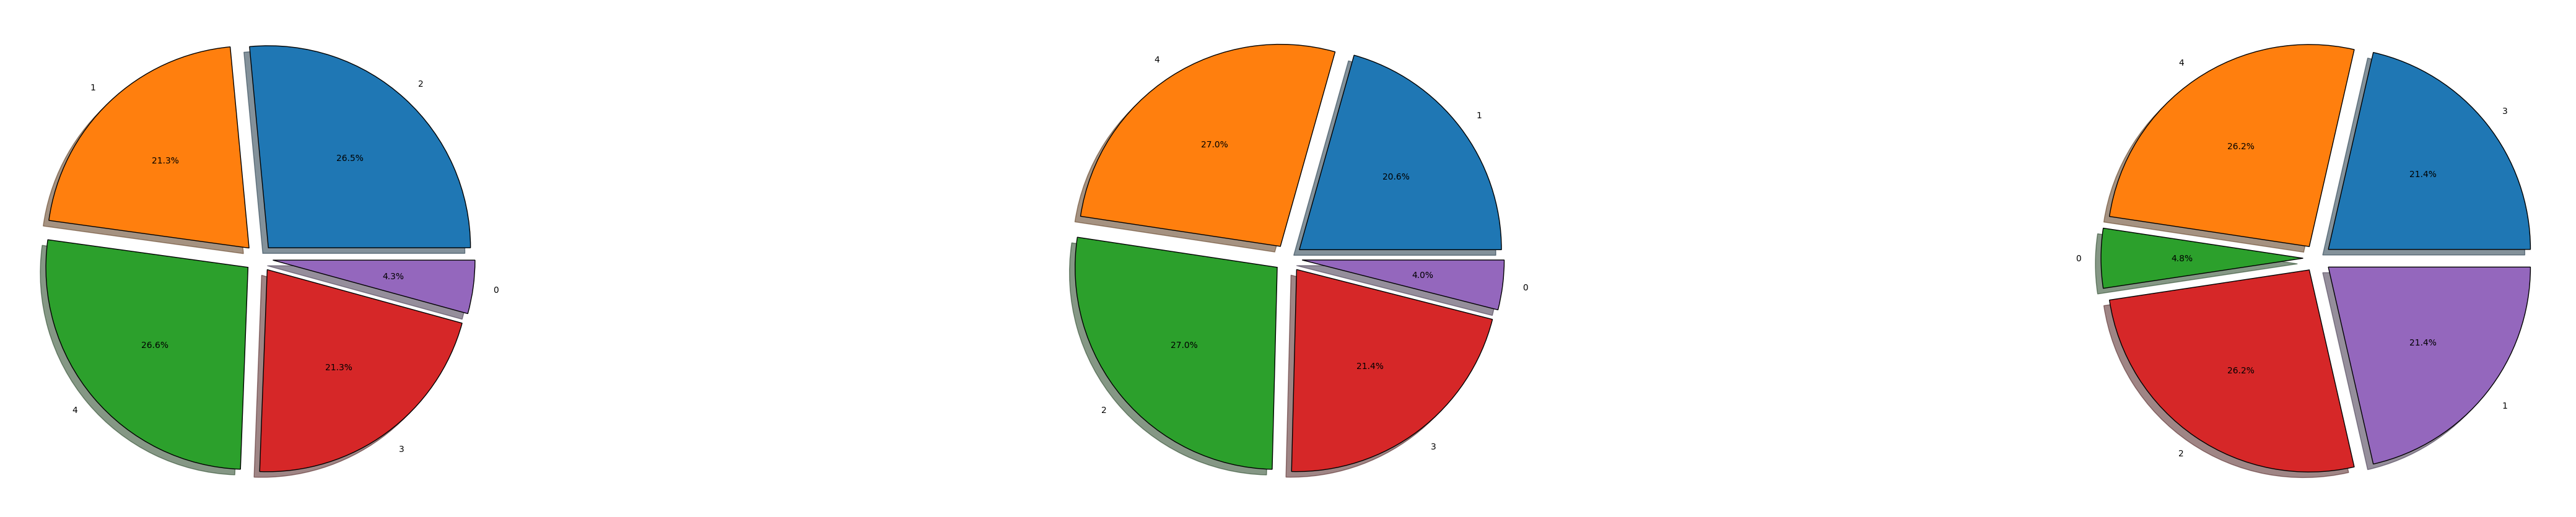

In [ ]:
for i, y_set in enumerate([Y_train, Y_valid, Y_test]):
    plt.subplot(6, 3, i + 1)
    plt.rcParams["figure.figsize"] = (50, 50)
    labels = y_set.astype('str').unique().tolist()
    slices = [y_set.astype('str').value_counts()[i] for i in labels]
    plt.pie(slices, labels=labels, explode=[0.07 for i in range(len(labels))], wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
    plt.tight_layout()

In [ ]:
X

,Age,Quantity,Fee,State,VideoAmt,PhotoAmt,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,StateName_x_Johor,StateName_x_Kedah,StateName_x_Kelantan,StateName_x_Kuala Lumpur,StateName_x_Melaka,StateName_x_Negeri Sembilan,StateName_x_Pahang,StateName_x_Perak,StateName_x_Pulau Pinang,StateName_x_Sarawak,StateName_x_Selangor,StateName_x_Terengganu,Type_1,Type_2,Gender_1.0,Gender_2.0,Gender_3.0,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,0.03125,0.000000,0.066667,41326,0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.06250,0.052632,0.000000,41326,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.06250,0.052632,0.000000,41326,0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.03125,0.000000,0.000000,41326,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.06250,0.000000,0.000000,41326,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.03125,0.000000,0.000000,41335,0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1256,0.34375,0.052632,0.000000,41335,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1257,0.03125,0.421053,0.133333,41335,0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1258,0.09375,0.000000,0.000000,41342,0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Clasification models creation
Choosing models that fits for my functionality and training them, analyzing results and choosing whichj one most accurate for my data


In [ ]:
# Let's train SVC with default parameters

svc_classifier = SVC()
svc_classifier.fit(X_train, Y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        27
           4       0.26      1.00      0.42        33

    accuracy                           0.26       126
   macro avg       0.05      0.20      0.08       126
weighted avg       0.07      0.26      0.11       126



In [ ]:
# Let's train logistic regression with default parameters

reg_log = LogisticRegression()
reg_log.fit(X_train, Y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.38      0.61      0.47        33
           3       0.40      0.22      0.29        27
           4       0.41      0.73      0.53        33

    accuracy                           0.40       126
   macro avg       0.24      0.31      0.26       126
weighted avg       0.29      0.40      0.32       126



In [ ]:
# Let's train GaussianNB with default parameters

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, Y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.04      0.67      0.08         6
           1       0.22      0.07      0.11        27
           2       0.00      0.00      0.00        33
           3       0.29      0.19      0.23        27
           4       0.50      0.06      0.11        33

    accuracy                           0.10       126
   macro avg       0.21      0.20      0.11       126
weighted avg       0.24      0.10      0.10       126



In [ ]:
# Let's train SGDClassifier with default parameters

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, Y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        33
           3       0.21      1.00      0.35        27
           4       0.00      0.00      0.00        33

    accuracy                           0.21       126
   macro avg       0.04      0.20      0.07       126
weighted avg       0.05      0.21      0.08       126



In [ ]:
# Let's train KNeighborsClassifier with default parameters

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, Y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.29      0.37      0.32        27
           2       0.26      0.33      0.29        33
           3       0.38      0.30      0.33        27
           4       0.50      0.36      0.42        33

    accuracy                           0.33       126
   macro avg       0.29      0.27      0.27       126
weighted avg       0.34      0.33      0.33       126



In [ ]:
# Let's train DecisionTreeClassifier with default parameters

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.17      0.12         6
           1       0.18      0.15      0.16        27
           2       0.23      0.30      0.26        33
           3       0.28      0.26      0.27        27
           4       0.38      0.30      0.34        33

    accuracy                           0.25       126
   macro avg       0.24      0.24      0.23       126
weighted avg       0.27      0.25      0.26       126



In [ ]:
# Let's train RandomForestClassifier with default parameters

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.25      0.22      0.24        27
           2       0.30      0.42      0.35        33
           3       0.25      0.15      0.19        27
           4       0.46      0.52      0.49        33

    accuracy                           0.33       126
   macro avg       0.25      0.26      0.25       126
weighted avg       0.31      0.33      0.31       126



In [ ]:
# Let's train RandomForestClassifier with non-default parameters

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.26      0.33      0.29        27
           2       0.27      0.36      0.31        33
           3       0.06      0.04      0.05        27
           4       0.44      0.36      0.40        33

    accuracy                           0.27       126
   macro avg       0.21      0.22      0.21       126
weighted avg       0.26      0.27      0.26       126



In [ ]:
# Let's train GradientBoostingClassifier with default parameters

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, Y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.30      0.37      0.33        27
           2       0.27      0.39      0.32        33
           3       0.18      0.11      0.14        27
           4       0.56      0.45      0.50        33

    accuracy                           0.33       126
   macro avg       0.26      0.27      0.26       126
weighted avg       0.32      0.33      0.32       126



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=150, algorithm="SAMME", random_state=0)
ada_model.fit(X_train, Y_train)
print(ada_model.score(X_valid, Y_valid))

0.30158730158730157


In [ ]:
ds


,Age,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,StateName_x_Johor,StateName_x_Kedah,StateName_x_Kelantan,StateName_x_Kuala Lumpur,StateName_x_Melaka,StateName_x_Negeri Sembilan,StateName_x_Pahang,StateName_x_Perak,StateName_x_Pulau Pinang,StateName_x_Sarawak,StateName_x_Selangor,StateName_x_Terengganu,Type_1,Type_2,Gender_1.0,Gender_2.0,Gender_3.0,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,0.03125,0.000000,0.066667,41326,0,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.06250,0.052632,0.000000,41326,0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.06250,0.052632,0.000000,41326,0,5.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.03125,0.000000,0.000000,41326,0,4.0,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.06250,0.000000,0.000000,41326,0,1.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.03125,0.000000,0.000000,41335,0,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1256,0.34375,0.052632,0.000000,41335,0,1.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1257,0.03125,0.421053,0.133333,41335,0,5.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1258,0.09375,0.000000,0.000000,41342,0,3.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'SGD': SGDClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(verbose=0),
    'Extra Trees': ExtraTreesClassifier(verbose=0),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(verbose=0),
    'XGBoost': XGBClassifier(verbosity=0),
    'LightGBM': LGBMClassifier(verbose=0),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# create a function to fit, predict and evaluate models
def fit_predict_score(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    Y_pred = np.round(model.predict(X_valid.values))
    return metrics.accuracy_score(Y_valid, Y_pred), metrics.f1_score(Y_valid, Y_pred, average='weighted')

# create a function to evaluate models
def evaluate_models(models, X_train, Y_train, X_valid, Y_valid):
    results = {'Model': [], 'Accuracy': [], 'F1 Score': []}
    for model_name, model in models.items():
        print(f'Evaluating {model_name}...')
        accuracy, f1 = fit_predict_score(model, X_train, Y_train, X_valid, Y_valid)
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['F1 Score'].append(f1)
    return pd.DataFrame(results)

# evaluate models
results = evaluate_models(models, X_train, Y_train, X_valid, Y_valid)

Evaluating Linear Regression...
Evaluating Logistic Regression...
Evaluating K-Nearest Neighbors...
Evaluating SVM...
Evaluating SGD...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Evaluating Naive Bayes...


In [ ]:
results.sort_values('F1 Score', ascending=False)

,Model,Accuracy,F1 Score
6,Random Forest,0.380952,0.372277
10,XGBoost,0.309524,0.302670
7,Extra Trees,0.293651,0.295463
11,LightGBM,0.293651,0.292123
9,Gradient Boosting,0.277778,0.279289
5,Decision Tree,0.269841,0.270209
8,AdaBoost,0.285714,0.269725
2,K-Nearest Neighbors,0.253968,0.246707
1,Logistic Regression,0.293651,0.231969
12,Naive Bayes,0.134921,0.150572


### Most accurate for my model RandomForest classification


In [ ]:
# we can use Random forest classifier
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
drop = []
X_columns = [
'Age',
'Quantity',
'Fee',
'State',
'VideoAmt',
'PhotoAmt',
'MaturitySize_1.0',
'MaturitySize_2.0',
'MaturitySize_3.0',
'MaturitySize_4.0',
'MaturitySize_Missing',
'ColorName_x_Black',
'ColorName_x_Brown',
'ColorName_x_Cream',
'ColorName_x_Golden',
'ColorName_x_Yellow',
'ColorName_y_Brown',
'ColorName_y_Cream',
'ColorName_y_Golden',
'ColorName_y_Gray',
'ColorName_y_Yellow',
'ColorName_Cream',
'ColorName_Golden',
'ColorName_Gray',
'ColorName_Missing',
'ColorName_White',
'ColorName_Yellow',
'StateName_x_Johor',
'StateName_x_Kedah',
'StateName_x_Kelantan',
'StateName_x_Kuala Lumpur',
'StateName_x_Melaka',
'StateName_x_Negeri Sembilan',
'StateName_x_Pahang',
'StateName_x_Perak',
'StateName_x_Pulau Pinang',
'StateName_x_Sarawak',
'StateName_x_Selangor',
'StateName_x_Terengganu',
'Type_1',
'Type_2',
'Gender_1.0',
'Gender_2.0',
'Gender_3.0',
'FurLength_1',
'FurLength_2',
'FurLength_3',
'Vaccinated_1',
'Vaccinated_2',
'Vaccinated_3',
'Dewormed_1',
'Dewormed_2',
'Dewormed_3',
'Sterilized_1',
'Sterilized_2',
'Sterilized_3',
'Health_1',
'Health_2',
'Health_3'
]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Age (0.099647)
2. PhotoAmt (0.098996)
3. Quantity (0.051184)
4. Fee (0.037652)
5. State (0.036583)
6. FurLength_1 (0.030335)
7. ColorName_y_Brown (0.028196)
8. FurLength_2 (0.026472)
9. MaturitySize_2.0 (0.025053)
10. ColorName_White (0.024982)
11. Dewormed_2 (0.023886)
12. Dewormed_1 (0.023234)
13. StateName_x_Selangor (0.023043)
14. ColorName_x_Black (0.021906)
15. Gender_1.0 (0.020892)
16. Type_2 (0.020288)
17. Vaccinated_1 (0.020062)
18. ColorName_y_Yellow (0.019924)
19. Gender_3.0 (0.019657)
20. ColorName_y_Cream (0.018584)
21. ColorName_y_Gray (0.018241)
22. Gender_2.0 (0.018197)
23. Type_1 (0.017247)
24. Vaccinated_2 (0.016856)
25. MaturitySize_1.0 (0.016765)
26. StateName_x_Kuala Lumpur (0.016436)
27. Sterilized_2 (0.015732)
28. ColorName_Cream (0.015153)
29. ColorName_Missing (0.015043)
30. MaturitySize_3.0 (0.012746)
31. Sterilized_3 (0.012623)
32. ColorName_x_Brown (0.012593)
33. Sterilized_1 (0.012542)
34. MaturitySize_Missing (0.011856)
35. ColorName_y_

### Feature importance showing using random forest classifier

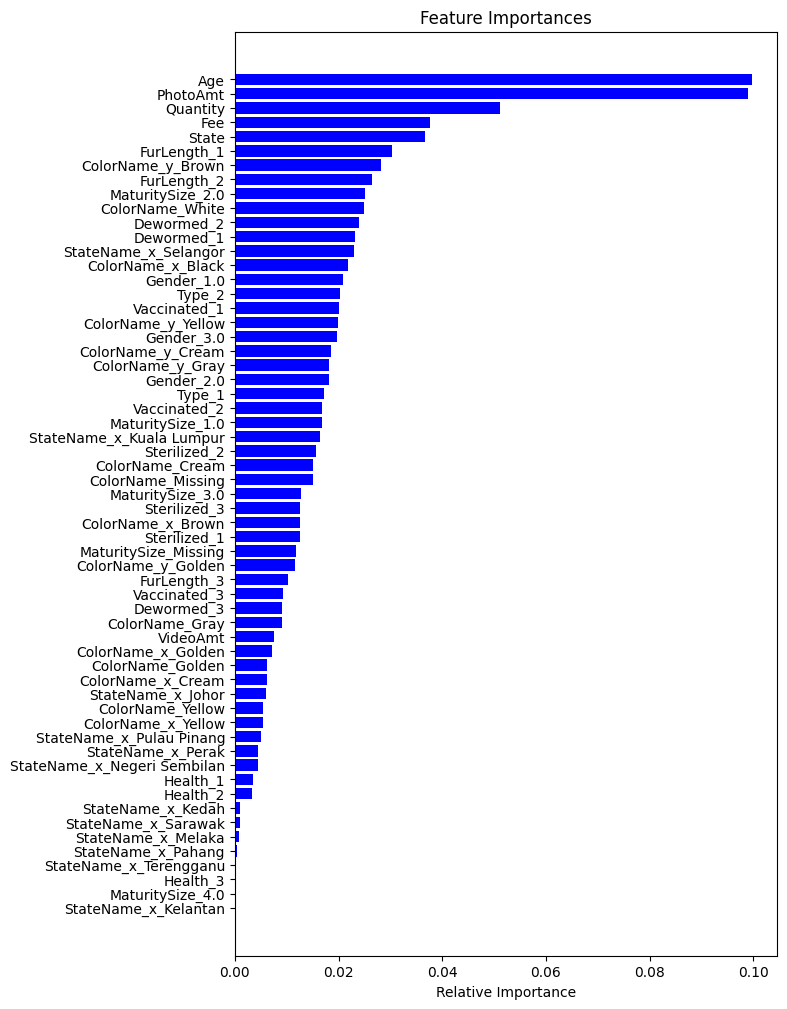

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature importance due to permutation_importance from scickit-learn

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. PhotoAmt (0.012698)
2. StateName_x_Melaka (0.009524)
3. VideoAmt (0.004762)
4. MaturitySize_Missing (0.004762)
5. StateName_x_Perak (0.003175)
6. Age (0.001587)
7. MaturitySize_3.0 (0.001587)
8. ColorName_x_Yellow (0.001587)
9. MaturitySize_4.0 (0.000000)
10. MaturitySize_2.0 (0.000000)
11. State (0.000000)
12. Health_2 (0.000000)
13. StateName_x_Kedah (0.000000)
14. ColorName_White (0.000000)
15. ColorName_Golden (0.000000)
16. ColorName_Cream (0.000000)
17. ColorName_y_Yellow (0.000000)
18. ColorName_y_Gray (0.000000)
19. ColorName_y_Golden (0.000000)
20. ColorName_y_Cream (0.000000)
21. ColorName_y_Brown (0.000000)
22. MaturitySize_1.0 (0.000000)
23. ColorName_x_Cream (0.000000)
24. ColorName_x_Brown (0.000000)
25. ColorName_x_Black (0.000000)
26. StateName_x_Kuala Lumpur (0.000000)
27. Health_3 (0.000000)
28. FurLength_2 (0.000000)
29. Gender_1.0 (0.000000)
30. Health_1 (0.000000)
31. Sterilized_3 (0.000000)
32. Sterilized_2 (0.000000)
33. Dewormed_3 (0.000000)


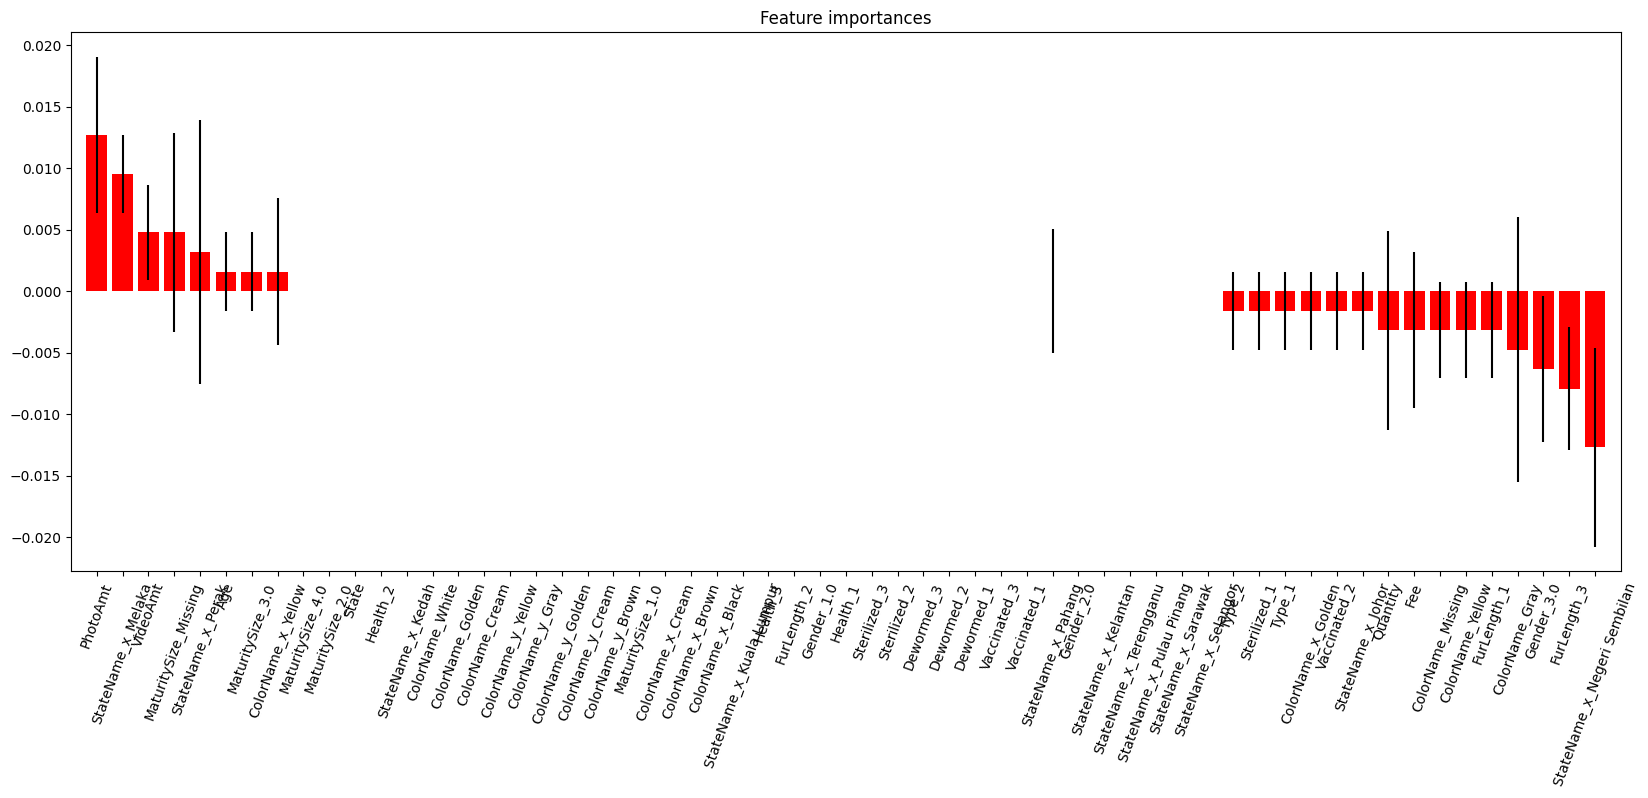

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Confusion matrix Display
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class (Wikipedia and other references may use different convention for axes).

By definition, entry  in a confusion matrix is the number of observations actually in group , but predicted to be in group . Here is an example:

[[ 1  2  1  1  1]
 [ 1  3 15  3  5]
 [ 2  7  8  8  8]
 [ 4  5  6  8  4]
 [ 3  4  9  6 11]]


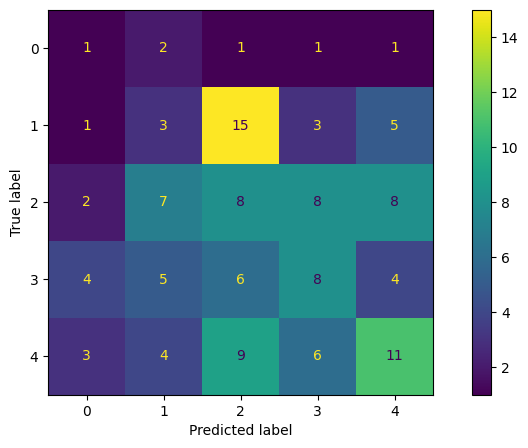

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()